# PCA
* sklearn.decomposition.PCA
* PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sqlalchemy import column


iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target

print(irisDF.shape)
irisDF.head(3)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


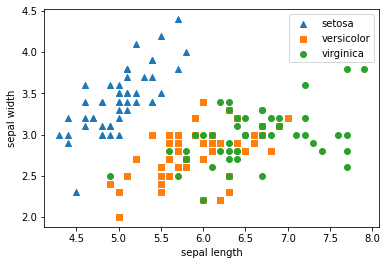

In [8]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o'] # 세모, 네모, 동그라미

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#fit()과 transform()을 호출하여 PCA변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# 차원이 2차원으로 변환된 것 확인
print(iris_pca.shape)

(150, 2)


In [11]:
#PCA변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1', 'pca_component_2']

irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


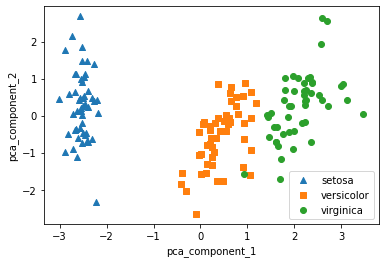

In [12]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o'] # 세모, 네모, 동그라미

#pca_component_1을 x축, pc_component_2를 y축으로 scatter plot수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [13]:
# 각 pca component별 변동성 비율
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [14]:
rcf = RandomForestClassifier(random_state=156)

# 원본 데이터
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [15]:
# pca로 차원축소한 데이터
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [17]:
iris= load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [18]:
lda = LinearDiscriminantAnalysis(n_components=2)
#fit 호출시 target값 입력
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


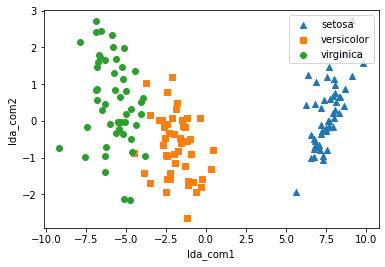

In [19]:
lda_columns = ['lda_com1', 'lda_com2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_com1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_com2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_com1')
plt.ylabel('lda_com2')
plt.show()

In [20]:
print(lda.explained_variance_ratio_)

[0.9912126 0.0087874]


In [ ]:
rcf = RandomForestClassifier(random_state=156)

# 원본 데이터
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))

In [ ]:
# pca로 차원축소한 데이터
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))